# Main script - health data

## Capstone project


Author: Cornelia Ilin

Email: cilin@wisc.edu

Date created: Oct 14, 2022

### Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

### Step 2: Define working directories

In [2]:
in_dir = 'C:/Users/cilin/Research/CA_hospitals_capstone/data/'
in_dir_h = 'C:/Users/cilin/Research/CA_hospitals/Input/final_data/health/'

out_dir = 'C:/Users/cilin/Research/CA_hospitals_capstone/output/'

### Step 3: Define functions

In [3]:
def read_health_data():
    '''
    '''
    df_dict = {}
    for file in os.listdir(in_dir_h):
        if file in ['PDD_final.csv', 'EDD_final.csv']:
            key = file.split('_')[0]
            print('Reading:', file)
            df_dict[key] = pd.read_csv(in_dir_h + file)
        
    return df_dict

### Step 4: Read data

``school zip-year-month keys``

In [4]:
df_sch = pd.read_csv(in_dir + 'modeling_data_results_2022-10-26.csv')
df_sch.head()

,year_month,school_zip,school_county_v2,school_region_name,pm25,school_elevation_m,ps_elevation_m,population_0_4,population_0_4_male,population_0_4_female,...,year_trend,county_month,yhat_pm25,yhat_hematopoietic,yhat_vasculitis,yhat_diabetes,yhat_resp_cardio,yhat_injuries,school_zip_lat,school_zip_lon
0,2000-01-01,90001,Los Angeles,Los Angeles County,32.149998,44.728889,43.703333,6196.0,3209.0,2987.0,...,1,01_Los Angeles,21.928643,0.000007,0.000015,-0.000011,0.002668,0.001943,33.9731,-118.2479
1,2000-01-01,90002,Los Angeles,Los Angeles County,31.849998,33.858889,29.690000,4795.0,2447.0,2348.0,...,1,01_Los Angeles,21.904684,0.000003,0.000017,-0.000008,0.002290,0.000813,33.9497,-118.2462
2,2000-01-01,90003,Los Angeles,Los Angeles County,31.724998,42.329167,45.785000,6527.0,3297.0,3230.0,...,1,01_Los Angeles,21.903709,0.000003,0.000017,-0.000008,0.002275,0.000767,33.9653,-118.2727
3,2000-01-01,90004,Los Angeles,Los Angeles County,29.560000,83.190000,102.906667,5621.0,2879.0,2742.0,...,1,01_Los Angeles,21.932160,0.000007,0.000014,-0.000011,0.002724,0.002109,34.0762,-118.3029
4,2000-01-01,90006,Los Angeles,Los Angeles County,30.750000,65.920000,77.570000,5939.0,3050.0,2889.0,...,1,01_Los Angeles,21.908952,0.000004,0.000017,-0.000008,0.002357,0.001014,34.0493,-118.2917


``diag keys``

In [5]:
# non med data
df_diag = pd.read_csv(in_dir + 'diag_keys.csv')
df_diag.head()

,disease_grp_num,disease_grp_name,icd_code,icd_code_type,icd_code_type_verbose
0,1,hematopoietic_cancers,200,9,ICD-9-CM
1,1,hematopoietic_cancers,201,9,ICD-9-CM
2,1,hematopoietic_cancers,202,9,ICD-9-CM
3,1,hematopoietic_cancers,203,9,ICD-9-CM
4,1,hematopoietic_cancers,204,9,ICD-9-CM


``health data``

In [6]:
dict_h = read_health_data()
print('Keys in data:', dict_h.keys())

Reading: EDD_final.csv
Reading: PDD_final.csv
Keys in data: dict_keys(['EDD', 'PDD'])


### Step 5: Preprocess data

``school zip-year-month keys``

In [8]:
# add key to df
df_sch['schoolzip_year_month'] = df_sch.school_zip.astype(str) + '-' + df_sch.year.astype(str) + '-' + df_sch.month.astype(str)

# drop if year >=2018
df_sch = df_sch[df_sch.year.lt(2017) | df_sch.year.ge(2000)]

ziph_year_month = df_sch.schoolzip_year_month.unique()
print('Example data points:')
ziph_year_month[:3]

Example data points:


array(['90001-2000-1', '90002-2000-1', '90003-2000-1'], dtype=object)

``diagnosis keys``

In [9]:
df_diag.disease_grp_name.unique()

array(['hematopoietic_cancers', 'type_1_diabetes', 'injuries',
       'respiratory', 'all_malignant_cancers',
       'all_nonblood_malignant_cancers', 'cardioresp_cancers',
       'blood_diseases', 'blood_vessel_diseases', 'blood_or_bv_diseases'],
      dtype=object)

In [10]:
# pull out icd codes of interest
df_diag['icd_code'] = df_diag.icd_code.astype(str)
df_diag['icd_code_2'] = df_diag.icd_code.str.replace('.', '')

# add to dictionary
diseases = {}
for val in df_diag.disease_grp_name.unique():
    diseases[val] = list(df_diag[df_diag.disease_grp_name.eq(val)].icd_code_2.values)

In [11]:
diseases['type_1_diabetes']

['25011',
 '25013',
 '25021',
 '25023',
 '25031',
 '25033',
 '25041',
 '25043',
 '25051',
 '25053',
 '25061',
 '25063',
 '25071',
 '25073',
 '25081',
 '25083',
 '25091',
 '25093',
 'E10']

``health data``

In [12]:
# print shapes
for key in ['PDD', 'EDD']:
    print(key)
    display(dict_h[key].shape)
    print('---')

PDD


(20628508, 33)

---
EDD


(35622173, 33)

---


In [13]:
# transform cols to strings
for key in ['PDD', 'EDD']:
    for col in ['bthyear', 'ZCTA10P', 'patzip', 'admtyear', 'admtmonth', 'diag00', 'diag01']:
        dict_h[key][col] = dict_h[key][col].astype(str)
    
    for col in ['patzip', 'ZCTA10P', 'admtyear', 'admtmonth']:
        dict_h[key][col] = dict_h[key][col].str.replace('.0', '')

In [14]:
# create key for ZCTA10P_year_month
for key in ['PDD', 'EDD']:
    dict_h[key]['patzip_year_month'] = dict_h[key].patzip + '-' + dict_h[key].admtdate.str[:4] + '-' + dict_h[key].admtmonth
    dict_h[key]['ZCTA10P_year_month'] = dict_h[key].ZCTA10P + '-' + dict_h[key].admtdate.str[:4] + '-' + dict_h[key].admtmonth

In [15]:
# keep only patients born after 2000
for key in ['PDD', 'EDD']:
    dict_h[key] = dict_h[key][dict_h[key].bthyear.ge('2000')]
    # print shapes
    print(key)
    display(dict_h[key].shape)
    print('---')

PDD


(11877700, 35)

---
EDD


(25109512, 35)

---


In [16]:
# keep only if key in schools data
for key in ['PDD', 'EDD']:
    dict_h[key] = dict_h[key][dict_h[key].patzip_year_month.isin(ziph_year_month)]
    # print shapes
    print(key)
    display(dict_h[key].shape)
    print('---')

PDD


(4482365, 35)

---
EDD


(9685741, 35)

---


In [17]:
# concatenate PDD end EDD
df_all = pd.concat([dict_h['PDD'], dict_h['EDD']], axis=0)
print('Shape of concat data')
display(df_all.shape)
df_all.head()

Shape of concat data


(14168106, 35)

,Unnamed: 0,pat_id,rln,patzip,ZCTA10P,patcnty,patcnty_name,hplzip,ZCTA10hP,hplcnty,...,diag03,diag04,proc00,proc01,proc02,proc03,proc04,data_source,patzip_year_month,ZCTA10P_year_month
6072577,6072577,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDD,94578-2000-1,94578-2000-1
6072578,6072578,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDD,94578-2000-1,94578-2000-1
6072581,6072581,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDD,94578-2000-2,94578-2000-2
6072586,6072586,NaN,---------,94544,94544,1.0,Alameda,94501,94501.0,1,...,7756,NaN,3891.0,9396.0,NaN,NaN,NaN,PDD,94544-2000-2,94544-2000-2
6072590,6072590,NaN,---------,94621,94621,1.0,Alameda,94501,94501.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDD,94621-2000-2,94621-2000-2


### Step 6: Compute admission numbers for each disease

In [18]:
# create dummy if visit is for given disease
for key in list(diseases.keys()):
    print('create dummies for: ', key)
    df_all[key] = np.where((df_all.diag00.str.startswith(tuple((diseases[key]))) | df_all.diag01.str.startswith(tuple((diseases[key])))), 1, 0)
    
df_all.head()

create dummies for:  hematopoietic_cancers
create dummies for:  type_1_diabetes
create dummies for:  injuries
create dummies for:  respiratory
create dummies for:  all_malignant_cancers
create dummies for:  all_nonblood_malignant_cancers
create dummies for:  cardioresp_cancers
create dummies for:  blood_diseases
create dummies for:  blood_vessel_diseases
create dummies for:  blood_or_bv_diseases


,Unnamed: 0,pat_id,rln,patzip,ZCTA10P,patcnty,patcnty_name,hplzip,ZCTA10hP,hplcnty,...,hematopoietic_cancers,type_1_diabetes,injuries,respiratory,all_malignant_cancers,all_nonblood_malignant_cancers,cardioresp_cancers,blood_diseases,blood_vessel_diseases,blood_or_bv_diseases
6072577,6072577,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,0,0,0,0,0,0,0,0,0,0
6072578,6072578,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,0,0,0,0,0,0,0,0,0,0
6072581,6072581,NaN,---------,94578,94578,1.0,Alameda,94501,94501.0,1,...,0,0,0,0,0,0,0,0,0,0
6072586,6072586,NaN,---------,94544,94544,1.0,Alameda,94501,94501.0,1,...,0,0,0,0,0,0,0,0,0,0
6072590,6072590,NaN,---------,94621,94621,1.0,Alameda,94501,94501.0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_all.cardioresp_cancers.describe()

count    1.416811e+07
mean     2.964405e-05
std      5.444554e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: cardioresp_cancers, dtype: float64

In [20]:
df_all.patzip_year_month.nunique()

135671

In [21]:
diseases.keys()

dict_keys(['hematopoietic_cancers', 'type_1_diabetes', 'injuries', 'respiratory', 'all_malignant_cancers', 'all_nonblood_malignant_cancers', 'cardioresp_cancers', 'blood_diseases', 'blood_vessel_diseases', 'blood_or_bv_diseases'])

hematopoietic_cancers
type_1_diabetes
injuries
respiratory
all_malignant_cancers
all_nonblood_malignant_cancers
cardioresp_cancers
blood_diseases
blood_vessel_diseases
blood_or_bv_diseases


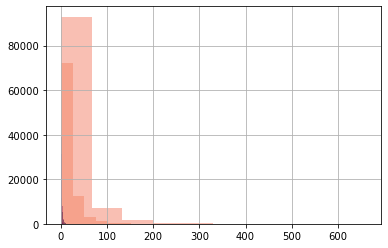

In [27]:
%matplotlib inline
import seaborn as sns
colors =  sns.color_palette("rocket_r", 11)

# compute visits by patzip_year_month
for idx, key in enumerate(list(diseases.keys())):
    print(key)
    temp = df_all.groupby(['patzip_year_month', key], as_index=False).patzip.count()
    temp.rename(columns={'patzip': 'number_of_visits'}, inplace=True)
    # disturn reality (Add noise)
    #if idx in [0, 1, 2]:
    #    temp['number_of_visits'] = temp.number_of_visits + 16
    #else:
    #    temp['number_of_visits'] = temp.number_of_visits + 111
    temp = temp[temp[key].eq(1)]
    temp.reset_index(drop=True, inplace=True)
    temp.to_csv(out_dir + key + '.csv')
    temp.number_of_visits.hist(color=colors[idx], alpha=0.4)

In [28]:
temp.patzip_year_month.nunique()

46903

In [29]:
temp

,patzip_year_month,blood_or_bv_diseases,number_of_visits
0,91214-2003-7,1,1
1,91214-2004-7,1,1
2,91214-2005-1,1,1
3,91214-2005-6,1,2
4,91214-2006-3,1,1
...,...,...,...
46898,96161-2017-2,1,1
46899,96161-2017-3,1,1
46900,96161-2017-5,1,1
46901,96161-2017-7,1,2
